# GRIP: The Spark Foundation

# TSF Task-3 : Exploratory Data Analysis - Retail

# By- Rohit Kumar

## Objective : Perform "Exploratory Data Analysis" on dataset "SampleSuperstore"

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the Dataset
dataset = pd.read_csv('SampleSuperstore.csv')

In [3]:
dataset.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
dataset.shape

(9994, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Cleaning of Dataset and Removing the Duplicate Data

In [7]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
dataset.duplicated().sum()

17

In [9]:
dataset = dataset.drop_duplicates()

## EDA - Exploratory Data Analysis

<AxesSubplot:>

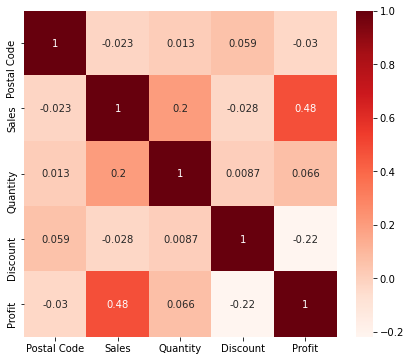

In [10]:
# Using Correlation Matrix

plt.figure(figsize=(7,6))
correlation = dataset.corr()
sns.heatmap(correlation,annot=True,cmap='Reds')

## Line Plot

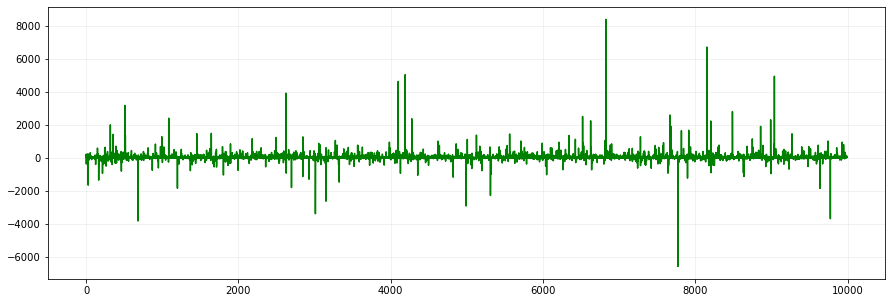

In [11]:
plt.figure(figsize=(15,5))
plt.plot(dataset['Profit'], color = 'green')
plt.grid(alpha=0.2)

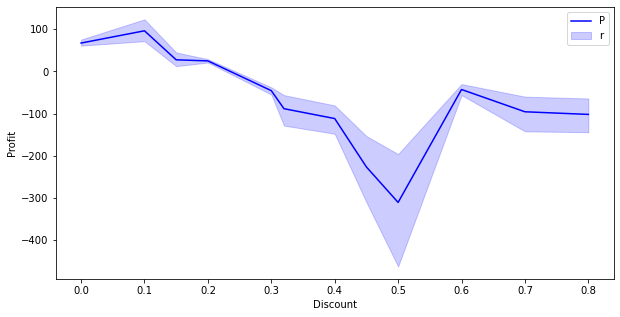

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'Discount', y = 'Profit', data = dataset, color = 'blue')
plt.legend('Profit')

In [13]:
dataset.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


## Distribution Plot

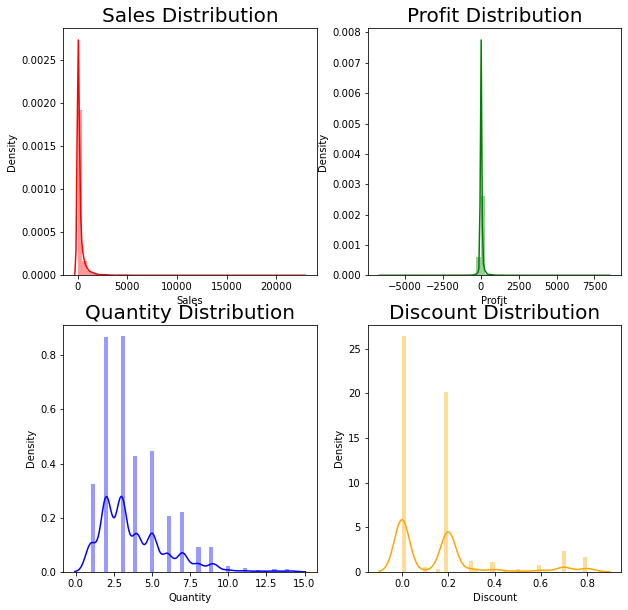

In [14]:
# Remove Warning
import warnings
warnings.filterwarnings('ignore')


fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize=(10,10))
sns.distplot(dataset['Sales'], color = 'Red', ax = axs[0][0])
sns.distplot(dataset['Profit'], color = 'Green', ax = axs[0][1])
sns.distplot(dataset['Quantity'], color = 'Blue', ax = axs[1][0])
sns.distplot(dataset['Discount'], color = 'Orange', ax = axs[1][1])


axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity Distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)

plt.show()

## State Wise analysis of Profit, Discount, Sales

In [15]:
dataset['State'].value_counts().head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

In [16]:
dataset_state = dataset.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
dataset_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


In [17]:
dataset_state1 = dataset_state.sort_values('Profit')

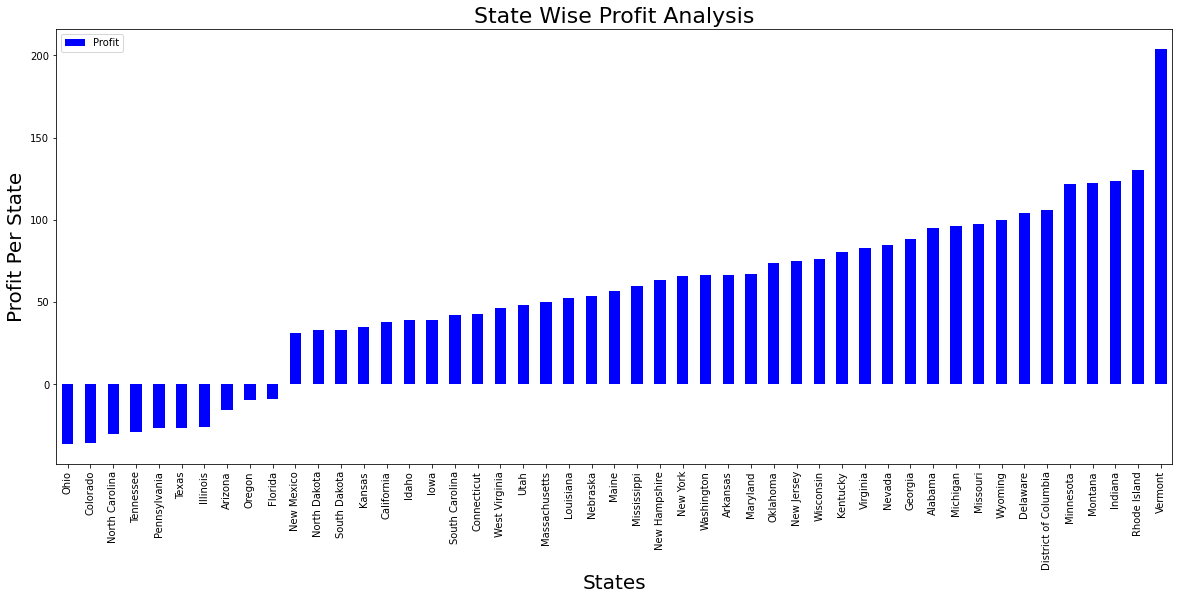

In [18]:
dataset_state1[['Profit']].plot(kind= 'bar', figsize=(20,8), color = 'Blue')
plt.title('State Wise Profit Analysis', fontsize = 22)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Profit Per State', fontsize = 20)
plt.show()

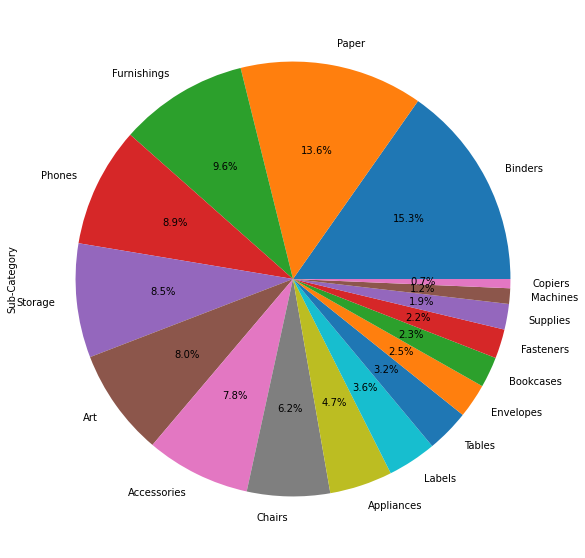

In [19]:
plt.figure(figsize=(10,10))
dataset['Sub-Category'].value_counts().plot.pie(autopct = '%3.1f%%')
plt.show()

## The Top Sub-Categories are Binders, Papers, Furnishings, Phone, Storage, Art and Accessories while the bottom pf subcategories are copiers and Machines

## Using Cat Plot

Text(-2.70000000000001, 0.5, 'Amount Ordered')

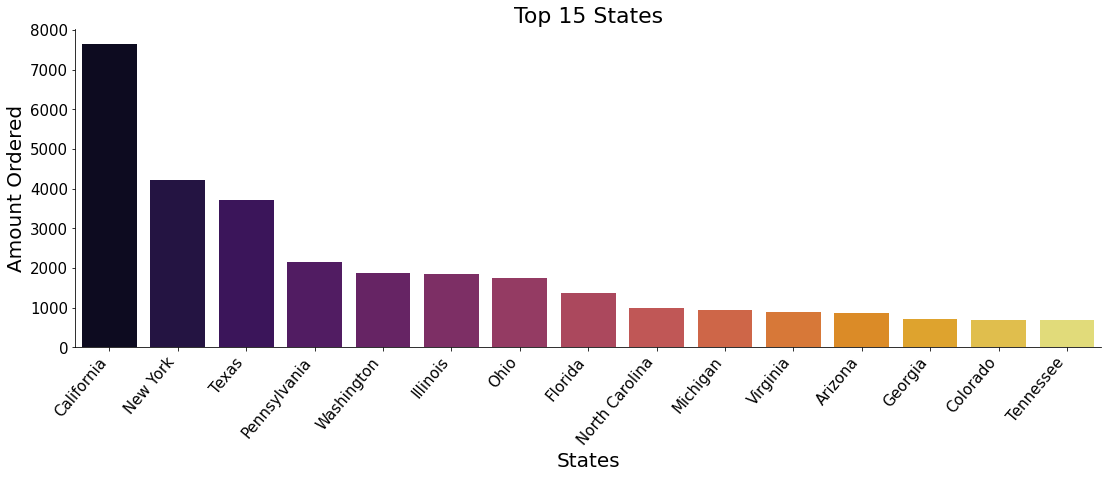

In [20]:
## Observing Top Selling States

top_15 = dataset.groupby('State')['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False)
sns.catplot(x = 'State', y = 'Quantity', data = top_15.head(15), kind = 'bar', palette = 'inferno', aspect = 3)
plt.title('Top 15 States', fontsize = 22)
plt.xticks(rotation = 50, ha = 'right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Amount Ordered', fontsize = 20)

## We Observe that the Top Selling States are California, New York and Texas.

## Profit VS Quantity

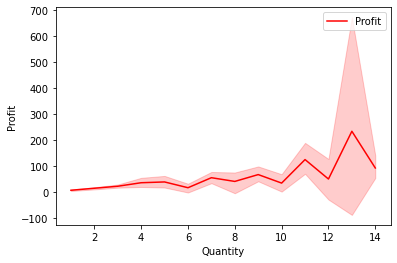

In [21]:
sns.lineplot(x = 'Quantity', y = 'Profit', label = 'Profit', data = dataset, color = 'red')
plt.legend()
plt.show()

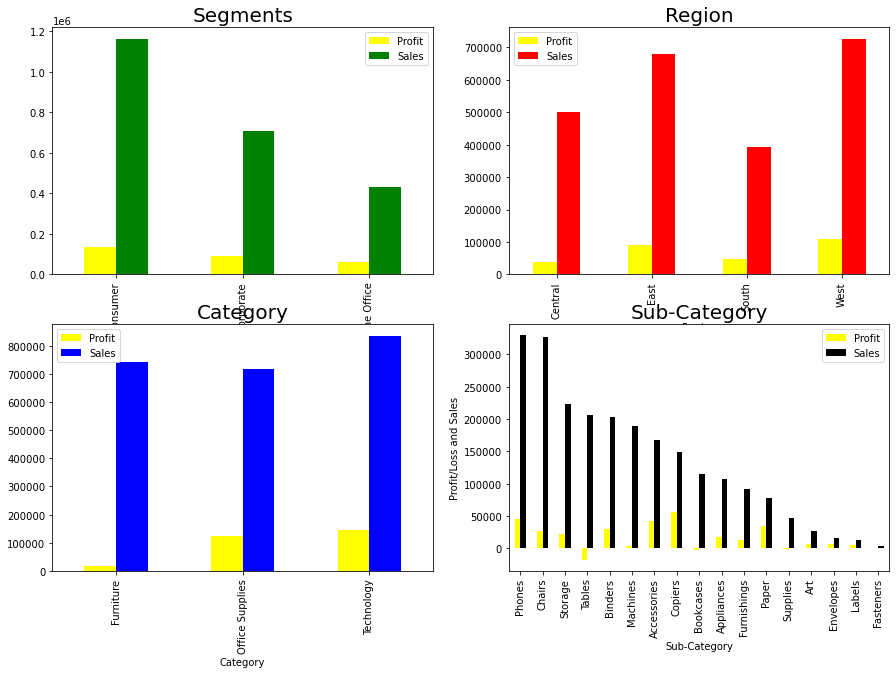

In [22]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (40,40))
dataset.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color = ['Yellow','Green'],figsize = (15,10), ax = axs[0][0])
plt.ylabel('Profit/Loss and Sales')

dataset.groupby('Region')[['Profit','Sales']].sum().plot.bar(color = ['Yellow','Red'],figsize = (15,10), ax = axs[0][1])
plt.ylabel('Profit/Loss and Sales')

dataset.groupby('Category')[['Profit','Sales']].sum().plot.bar(color = ['Yellow','Blue'],figsize = (15,10), ax = axs[1][0])
plt.ylabel('Profit/Loss and Sales')


ps = dataset.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by = 'Sales', ascending = False)
ps[:].plot.bar(color = ['Yellow','Black'],figsize = (15,10), ax = axs[1][1])
plt.ylabel('Profit/Loss and Sales')

axs[0][0].set_title('Segments', fontsize = 20)
axs[0][1].set_title('Region', fontsize = 20)
axs[1][0].set_title('Category', fontsize = 20)
axs[1][1].set_title('Sub-Category', fontsize = 20)

plt.show()

## From the above Graph we observe that

## Graph 1 - Profit and Sales are maximum in the consumer segment and minimum in the home office segement

## Graph 2 - Profit and Sales are maximum in the West Region and minimum in the home South Region

## Graph 3 - Technology and office supplies have the highest proft whereas furniture have least profit

## Graph 4 -

### 1. Phone have high Sales

### 2. Chairs have less proft than sub-category phones.

### 3. Tables and Book-cases are facing Loss.

# Final Observations and Solutions Being a Business Manager

## As a Business Manager, try to find the weak areas where you can make more Profit?

## 1. Since furnitures ave less Profit, more Advertising and Discount Strategies will be needed to grasp Public Attention

## 2. The latest preferred shipping modes are Same Day and First Class modes. So inorder to resolve this issue we need to advertise more and also provide Prime Membership to people who order frequently so that they canuse methods like First Class modesand Same day with minimum expenses

## 3. South Region is the least shipped area. So in order to Overcome this problem more Advertising and Indulgence is needed, Apply different branding strategies, Reduce the Shipment Charge or even reduce Price of Product within the Margin limit.